In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
plt.style.use('seaborn')
%matplotlib inline

# Function to convert features to Polynomial

In [4]:
def polynomial_dataset(feature,degree,dataset):
    md = pd.DataFrame()
    for i in range(1,degree+1):
        if(len(feature) == 1):
            md['power_'+str(i)]= list(map(lambda x: x**i,dataset[feature[0]]))
        else:
            md['power_'+str(i)]= list(map(lambda x: x**i,dataset[feature[i-1]]))
    return md

# Loading the dataset

In [5]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [9]:
house_data = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
print(house_data.shape)

(21613, 21)


In [11]:
house_data = house_data.sort_values(['sqft_living','price'])

# Fitting a polynomial model of degree 15 to this data using L2 penalty

In [13]:
data = polynomial_dataset(['sqft_living'],15,house_data)
data['price'] = house_data['price']
data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,221900.0
1,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,538000.0
2,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38,180000.0
3,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38,604000.0
4,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,510000.0


In [14]:
X = np.array(data.drop('price',axis=1))
Y = np.array(data['price']).reshape(-1,1)
print(X.shape,Y.shape)

(21613, 15) (21613, 1)


In [18]:
l2_penalty = 1.5e-5
model_1 = Ridge(alpha = l2_penalty,normalize=True)
model_1.fit(X,Y)

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [19]:
print(model_1.coef_,model_1.intercept_)

[[-2.71466951e+01  4.53950134e-03  2.18187772e-06 -3.13875225e-10
   1.14699419e-15  8.70244422e-19 -8.12615496e-24 -4.49757556e-27
  -2.33284480e-31  6.32589458e-36  2.05553911e-39  1.92010406e-43
   9.62346802e-48 -1.63219328e-52 -1.09197777e-55]] [555730.91754847]


# Visualizing the model

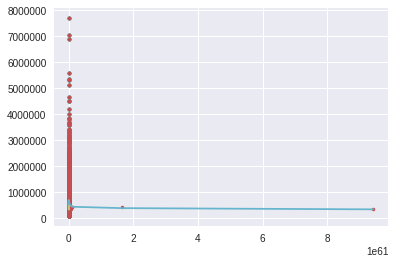

In [21]:
plt.plot(X,Y,'.')
plt.plot(X,model_1.predict(X),'-')
plt.show()

# Fitting to 4 subsets. (To observe high variance)

In [22]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

### Fitting to set 1

In [25]:
data_1 = polynomial_dataset(['sqft_living'],15,set_1)
data_1['price'] = set_1['price']
print(data_1.shape)

(5404, 16)


[23888.82546764] [[ 5.44669399e+02 -3.55447604e-01  1.22446381e-04 -1.17175309e-08
  -3.90512596e-13 -1.39076128e-17  1.47860302e-20  6.87491654e-25
  -7.57204140e-29 -1.04097261e-32 -3.71844401e-37  3.39989338e-41
   5.56592041e-45  2.53761378e-49 -3.35152912e-53]]


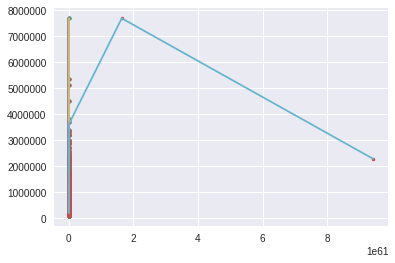

In [29]:
X = data_1.drop('price',axis=1)
Y = np.array(data_1['price']).reshape(-1,1)
model_set_1 = Ridge(alpha = 1e-9,normalize=True)
model_set_1.fit(X,Y)
print(model_set_1.intercept_,model_set_1.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model_set_1.predict(X),'-')
plt.show()

(5398, 16)
[-55614.63848011] [[ 8.59362645e+02 -8.18118275e-01  4.28879985e-04 -9.12770684e-08
  -2.69604322e-12  3.73980295e-15 -1.42711901e-19 -6.30794689e-23
  -1.44559571e-27  7.44321314e-31  9.25865808e-35  3.28007834e-41
  -1.29543483e-42 -1.38781275e-46  1.66546449e-50]]


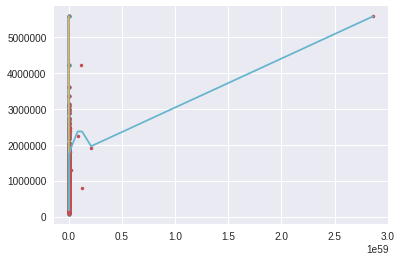

In [32]:
data_2 = polynomial_dataset(['sqft_living'],15,set_2)
data_2['price'] = set_2['price']
print(data_2.shape)
X = data_2.drop('price',axis=1)
Y = np.array(data_2['price']).reshape(-1,1)
model_set_2 = Ridge(alpha = 1e-9,normalize=True)
model_set_2.fit(X,Y)
print(model_set_2.intercept_,model_set_2.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model_set_2.predict(X),'-')
plt.show()

(5409, 16)
[470987.86932925] [[-7.55395955e+02  9.75579542e-01 -4.58946015e-04  7.77958171e-08
   7.15013294e-12 -2.88602006e-15 -2.13677263e-20  3.38085166e-23
   2.19178179e-27 -1.97067777e-31 -4.15993166e-35 -1.80196075e-39
   3.19071081e-43  5.08456884e-47 -3.93304230e-51]]


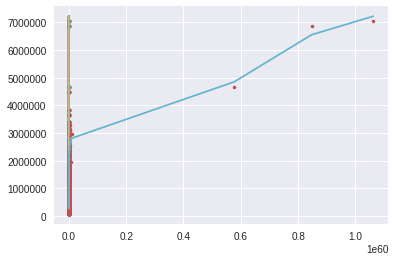

In [33]:
data_3 = polynomial_dataset(['sqft_living'],15,set_3)
data_3['price'] = set_3['price']
print(data_3.shape)
X = data_3.drop('price',axis=1)
Y = np.array(data_3['price']).reshape(-1,1)
model_set_3 = Ridge(alpha = 1e-9,normalize=True)
model_set_3.fit(X,Y)
print(model_set_3.intercept_,model_set_3.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model_set_3.predict(X),'-')
plt.show()

(5402, 16)
[-145655.61649635] [[ 1.11944570e+03 -9.83760190e-01  3.38770877e-04  3.60377304e-08
  -4.37814037e-11  5.77191687e-15  7.66795326e-19 -9.49297879e-23
  -1.96030800e-26 -2.10880812e-32  3.31005043e-34  3.47733911e-38
  -2.43039270e-42 -8.79553320e-46  6.44569706e-50]]


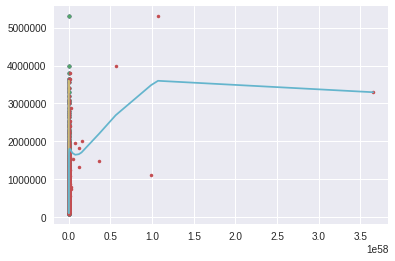

In [34]:
data_4 = polynomial_dataset(['sqft_living'],15,set_4)
data_4['price'] = set_4['price']
print(data_4.shape)
X = data_4.drop('price',axis=1)
Y = np.array(data_4['price']).reshape(-1,1)
model_set_4 = Ridge(alpha = 1e-9,normalize=True)
model_set_4.fit(X,Y)
print(model_set_4.intercept_,model_set_4.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model_set_4.predict(X),'-')
plt.show()

In [38]:
min_coef = min([model_set_1.coef_[0][0],model_set_2.coef_[0][0],model_set_3.coef_[0][0],model_set_4.coef_[0][0]])
print(min_coef)

-755.3959548965071


In [40]:
max_coef = max([model_set_1.coef_[0][0],model_set_2.coef_[0][0],model_set_3.coef_[0][0],model_set_4.coef_[0][0]])
print(max_coef)

1119.4457003710559


# Now Increasing the value of l2 penalty and see the results on these 4 sets

(5404, 16)
[539103.0310578] [[2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
  1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
  1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
  4.09542560e-50 2.85464889e-54 1.99547476e-58]]


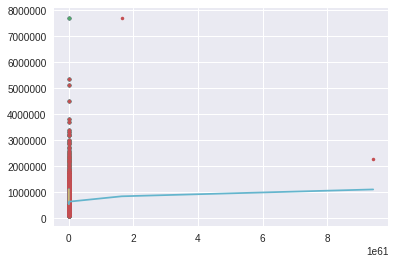

In [41]:
data_1 = polynomial_dataset(['sqft_living'],15,set_1)
data_1['price'] = set_1['price']
print(data_1.shape)
X = data_1.drop('price',axis=1)
Y = np.array(data_1['price']).reshape(-1,1)
model_set_1 = Ridge(alpha = 1.23e2,normalize=True)
model_set_1.fit(X,Y)
print(model_set_1.intercept_,model_set_1.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model_set_1.predict(X),'-')
plt.show()

(5398, 16)
[529853.0253578] [[2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
  9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
  9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
  1.15453748e-47 1.23211305e-51 1.31986696e-55]]


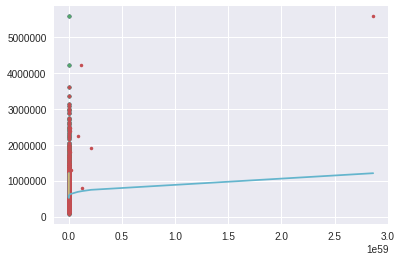

In [42]:
data_2 = polynomial_dataset(['sqft_living'],15,set_2)
data_2['price'] = set_2['price']
print(data_2.shape)
X = data_2.drop('price',axis=1)
Y = np.array(data_2['price']).reshape(-1,1)
model_set_2 = Ridge(alpha = 1.23e2,normalize=True)
model_set_2.fit(X,Y)
print(model_set_2.intercept_,model_set_2.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model_set_2.predict(X),'-')
plt.show()

(5409, 16)
[533640.11409744] [[2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
  6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
  4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
  4.84635021e-48 4.85883628e-52 4.87558469e-56]]


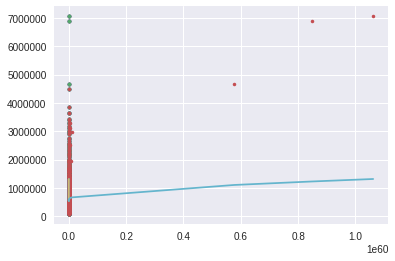

In [43]:
data_3 = polynomial_dataset(['sqft_living'],15,set_3)
data_3['price'] = set_3['price']
print(data_3.shape)
X = data_3.drop('price',axis=1)
Y = np.array(data_3['price']).reshape(-1,1)
model_set_3 = Ridge(alpha = 1.23e2,normalize=True)
model_set_3.fit(X,Y)
print(model_set_3.intercept_,model_set_3.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model_set_3.predict(X),'-')
plt.show()

(5402, 16)
[524562.96904668] [[2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
  1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
  2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
  5.67212304e-47 6.85958087e-51 8.30843630e-55]]


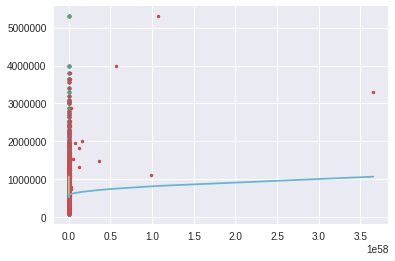

In [44]:
data_4 = polynomial_dataset(['sqft_living'],15,set_4)
data_4['price'] = set_4['price']
print(data_4.shape)
X = data_4.drop('price',axis=1)
Y = np.array(data_4['price']).reshape(-1,1)
model_set_4 = Ridge(alpha = 1.23e2,normalize=True)
model_set_4.fit(X,Y)
print(model_set_4.intercept_,model_set_4.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model_set_4.predict(X),'-')
plt.show()

In [45]:
min_coef = min([model_set_1.coef_[0][0],model_set_2.coef_[0][0],model_set_3.coef_[0][0],model_set_4.coef_[0][0]])
print(min_coef)

2.085961940919307


In [46]:
max_coef = max([model_set_1.coef_[0][0],model_set_2.coef_[0][0],model_set_3.coef_[0][0],model_set_4.coef_[0][0]])
print(max_coef)

2.328068029579325


# Selecting a L2- Penalty Value using Cross-Validation

In [111]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [112]:
train_valid_shuffled.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4.0,2.50,2800.0,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580.0,5900.0
1,1703050500,20150321T000000,645000.0,3.0,2.50,2490.0,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710.0,6629.0
2,5700002325,20140605T000000,640000.0,3.0,1.75,2340.0,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360.0,4725.0
3,0475000510,20141118T000000,594000.0,3.0,1.00,1320.0,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700.0,5000.0
4,0844001052,20150128T000000,365000.0,4.0,2.50,1904.0,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560.0,12426.0


In [113]:
len(train_valid_shuffled)

19396

## Dividing Data into K- Folds

In [115]:
n = len(train_valid_shuffled)
k = 10
for i in range(0,k):
    print(f'slice{i+1}: Start: {int((n*i)/k)}, End: {int((n*(i+1)/k)-1)}')

slice1: Start: 0, End: 1938
slice2: Start: 1939, End: 3878
slice3: Start: 3879, End: 5817
slice4: Start: 5818, End: 7757
slice5: Start: 7758, End: 9697
slice6: Start: 9698, End: 11636
slice7: Start: 11637, End: 13576
slice8: Start: 13577, End: 15515
slice9: Start: 15516, End: 17455
slice10: Start: 17456, End: 19395


# K-Fold Cross Validation

In [143]:
def k_fold_cross_valid(k,l2_penalty,data,output):
    #print(data.shape,output.shape)
    rss_val = {}
    n = len(data)
    for i in range(0,k):
        
        start = int((n*i/k))
        end = int((n*(i+1)/k)-1)
        
        X_val = data[start:end+1]
        Y_val = data[start:end+1]
        
        X_train = data[0:start]
        X_train = X_train.append(data[end+1:])
        Y_train = data[0:start]
        Y_train = Y_train.append(data[end+1:])
        
        model = Ridge(alpha = l2_penalty,normalize=True)
        model.fit(X_train,Y_train)
        rss_val[str(i+1)] = np.sum(np.square(Y_val - model.predict(X_val)))
    
    return np.mean(list(rss_val.values()))
        

# Decide the best value for l2 penalty

In [144]:
data = polynomial_dataset(['sqft_living'],15,train_valid_shuffled)
data['price'] = train_valid_shuffled['price']
print(train_valid_shuffled.shape)
print(data.shape)

(19396, 21)
(19396, 16)


In [145]:
X = data.drop('price',axis=1)
Y = np.array(data['price']).reshape(-1,1)
print(X.shape,Y.shape)

(19396, 15) (19396, 1)


In [146]:
l2_penalty_arr = np.logspace(3,9,num=13)
l2_penalty_arr = l2_penalty_arr.reshape(-1,1)
l2_penalty_arr.shape

(13, 1)

In [147]:
rss_val_final = {}
for i in l2_penalty_arr:
    rss_val_final['L2 Penalty Value:'+ str(i)] = k_fold_cross_valid(10,i,X,Y)
min_rss = min(rss_val_final.values())
print(f'The min RSS values is: {min_rss}')
#print(rss_val_final)


The min RSS values is: 6.020491501637786e+121


In [148]:
rss_val_final

{'L2 Penalty Value:[1000.]': 6.020491501637786e+121,
 'L2 Penalty Value:[3162.27766017]': 6.076620830588062e+121,
 'L2 Penalty Value:[10000.]': 6.0946228187699495e+121,
 'L2 Penalty Value:[31622.77660168]': 6.100341148821455e+121,
 'L2 Penalty Value:[100000.]': 6.102152015515893e+121,
 'L2 Penalty Value:[316227.76601684]': 6.1027249194157575e+121,
 'L2 Penalty Value:[1000000.]': 6.102906113305126e+121,
 'L2 Penalty Value:[3162277.66016838]': 6.102963414421189e+121,
 'L2 Penalty Value:[10000000.]': 6.102981534882893e+121,
 'L2 Penalty Value:[31622776.60168379]': 6.102987265101813e+121,
 'L2 Penalty Value:[1.e+08]': 6.102989077158652e+121,
 'L2 Penalty Value:[3.16227766e+08]': 6.102989650181777e+121,
 'L2 Penalty Value:[1.e+09]': 6.102989831387296e+121}

In [101]:
X[1939:]

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
1939,1800.0,3240000.0,5.832000e+09,1.049760e+13,1.889568e+16,3.401222e+19,6.122200e+22,1.101996e+26,1.983593e+29,3.570467e+32,6.426841e+35,1.156831e+39,2.082296e+42,3.748134e+45,6.746641e+48
1940,2890.0,8352100.0,2.413757e+10,6.975757e+13,2.015994e+17,5.826222e+20,1.683778e+24,4.866119e+27,1.406308e+31,4.064231e+34,1.174563e+38,3.394487e+41,9.810067e+44,2.835109e+48,8.193466e+51
1941,2740.0,7507600.0,2.057082e+10,5.636406e+13,1.544375e+17,4.231588e+20,1.159455e+24,3.176907e+27,8.704725e+30,2.385095e+34,6.535159e+37,1.790634e+41,4.906336e+44,1.344336e+48,3.683481e+51
1942,4590.0,21068100.0,9.670258e+10,4.438648e+14,2.037340e+18,9.351389e+21,4.292287e+25,1.970160e+29,9.043034e+32,4.150753e+36,1.905195e+40,8.744847e+43,4.013885e+47,1.842373e+51,8.456493e+54
1943,2490.0,6200100.0,1.543825e+10,3.844124e+13,9.571869e+16,2.383395e+20,5.934654e+23,1.477729e+27,3.679545e+30,9.162067e+33,2.281355e+37,5.680573e+40,1.414463e+44,3.522012e+47,8.769810e+50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19391,2480.0,6150400.0,1.525299e+10,3.782742e+13,9.381200e+16,2.326538e+20,5.769813e+23,1.430914e+27,3.548666e+30,8.800692e+33,2.182572e+37,5.412777e+40,1.342369e+44,3.329075e+47,8.256105e+50
19392,1670.0,2788900.0,4.657463e+09,7.777963e+12,1.298920e+16,2.169196e+19,3.622558e+22,6.049671e+25,1.010295e+29,1.687193e+32,2.817612e+35,4.705412e+38,7.858038e+41,1.312292e+45,2.191528e+48
19393,2403.0,5774409.0,1.387590e+10,3.334380e+13,8.012515e+16,1.925407e+20,4.626754e+23,1.111809e+27,2.671677e+30,6.420040e+33,1.542736e+37,3.707193e+40,8.908386e+43,2.140685e+47,5.144066e+50
19394,3780.0,14288400.0,5.401015e+10,2.041584e+14,7.717187e+17,2.917097e+21,1.102662e+25,4.168064e+28,1.575528e+32,5.955497e+35,2.251178e+39,8.509452e+42,3.216573e+46,1.215865e+50,4.595968e+53


In [103]:
len(Y[1939:])

17457

# Finally training all data on this l2 penalty value and compute RSS for Test Data

(21613, 16)
[540036.96252339] [[ 1.53738420e-02  2.68828361e-06  2.95633981e-10  1.49145217e-14
   3.37677405e-19 -9.24293132e-24 -1.91795154e-27 -1.83737603e-31
  -1.49513199e-35 -1.14617616e-39 -8.56547634e-44 -6.32768982e-48
  -4.65024395e-52 -3.40996761e-56 -2.49865553e-60]]


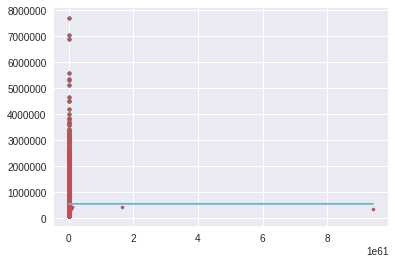

In [149]:
data = polynomial_dataset(['sqft_living'],15,house_data)
data['price'] = house_data['price']
print(data.shape)
X = data.drop('price',axis=1)
Y = np.array(data['price']).reshape(-1,1)
model = Ridge(alpha = 1000.,normalize=True)
model.fit(X,Y)
print(model.intercept_,model.coef_)
plt.plot(X,Y,'.')
plt.plot(X,model.predict(X),'-')
plt.show()

In [151]:
test_data = polynomial_dataset(['sqft_living'],15,test)
test_data['price'] = test['price']
X_test = test_data.drop('price',axis=1)
Y_test = np.array(test_data['price']).reshape(-1,1)

rss = np.sum(np.square(Y_test - model.predict(X_test)))

In [152]:
rss

284645127028312.8

In [157]:
np.round(-2.71466951e+01,0)

-27.0

# Questions
4. Quiz Question: What’s the learned value for the coefficient of feature power_1?
#### ANS: -2.71466951e+01
8. Quiz Question: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?
#### ANS: -755.3959548965071 ,  1119.4457003710559
11. QUIZ QUESTION: For the models learned with regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1
#### ANS: 2.085961940919307 , 2.328068029579325
12. Quiz Question: What is the best value for the L2 penalty according to 10-fold validation?
#### ANS: 1000
 
19. Quiz Question: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty?
#### ANS: 284645127028312.8